In [4]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


def process_pmdk_res(file, groupby, filter_col=None, values=None, scale=1, piece=False):
    df = pd.read_csv(file)

    # 10 seconds
    df['tp'] = df.success/10 / scale
    if piece:
        df['rate'] = df.pc_success/ (df.pc_success + df.pc_abort)
    else:
        df['rate'] = df.success/ (df.success+df.abort)
        
    df['tp-core'] = df.tp / df.thread_num
    if filter_col != None:
        df = df.loc[~df[filter_col].isin(values)]
            

    df_avg = df.groupby(groupby, as_index=False).mean()
    
    return df_avg


file = '../movnt-clwb.csv'
df = pd.read_csv(file)

print(df.head())


                                                                                                                                                                                                                                                                                                                                                                                                                                pmcpy_pmem_memcpy_persist: pmem_memcpy [24] [group: pmem]  \
total-avg[sec] ops-per-second[1/sec] total-max[sec] total-min[sec] total-median[sec] total-std-dev[sec] latency-avg[nsec] latency-min[nsec] latency-max[nsec] latency-std-dev[nsec] latency-pctl-50.0%[nsec] latency-pctl-99.0%[nsec] latency-pctl-99.9%[nsec] threads ops-per-thread data-size seed repeats thread-affinity main-affinity min-exe-time operation src-offset dest-offset src-mode dest-mode libc-memcpy persist                                          no-warmup          
0.011128       4493227.313538        0.011128 

In [7]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

thd_colors = {4: 'b', 8: 'g', 16:'r', 32:'c'}
markers = ['<', 's', 'o', 'v']
lines = [':', '-', ':', '-']
colors = ['b','g','r','y','p']
thd_markers = {4: '<', 8: 's', 16:'o', 32:'v'}








def process_data(file, groupby, filter_col=None, values=None, scale=1, piece=False):
    df = pd.read_csv(file)

    # 10 seconds
    df['tp'] = df.success/10 / scale
    if piece:
        df['rate'] = df.pc_success/ (df.pc_success + df.pc_abort)
    else:
        df['rate'] = df.success/ (df.success+df.abort)
        
    df['tp-core'] = df.tp / df.thread_num
    if filter_col != None:
        df = df.loc[~df[filter_col].isin(values)]
            

    df_avg = df.groupby(groupby, as_index=False).mean()
    
    return df_avg


def draw_one_serie(serie,x_axis, y_axis_set, title, xlabel, ylabel, groupby, markers,colors, legend, name):
    plt.figure(figsize=(13,7))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    for idx, y_axis in enumerate(y_axis_set):
        idx_key = 0
        marker = markers[idx]
        color=colors[idx]
        plt.plot(serie[x_axis], serie[y_axis] ,
                     marker=marker, 
                     linestyle=lines[idx], 
                     markersize=10,
                     color=color
                    ) 
        idx_key+=1
        # data points label
        for xy in zip(serie[x_axis], serie[y_axis]):   
            plt.annotate('---( %.2f K)' % (xy[1]/1000), xy=xy, textcoords='data') 
    
                                
    
    
    plt.legend()
    plt.show()
    




def draw_mul_serie(series,x_axis, y_axis, y_min, title, xlabel, ylabel, groupby, markers,colors, legend, name, annotate_fn):
    plt.figure(figsize=(11,6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(list(map(lambda x: int(x), series[0][x_axis])))
    
    for idx, serie in enumerate(series):
        idx_key = 0
        marker = markers[idx]
        color=colors[idx]
        plt.plot(serie[x_axis], serie[y_axis] ,
                     label= '{}: {}'.format(legend[idx], name), 
                     marker=marker, 
                     linestyle=lines[idx], 
                     markersize=10,
                     color=color,
                    ) 
        idx_key+=1
        
        for xy in zip(serie[x_axis], serie[y_axis]):   
            # plt.annotate('---( %.2f K)' % (xy[1]/1000), xy=xy, textcoords='data') 
            plt.annotate(annotate_fn(xy[1]), xy=xy, textcoords='data') 

    
    
    plt.legend()
    plt.ylim(ymin=y_min)
    plt.show()
    
    




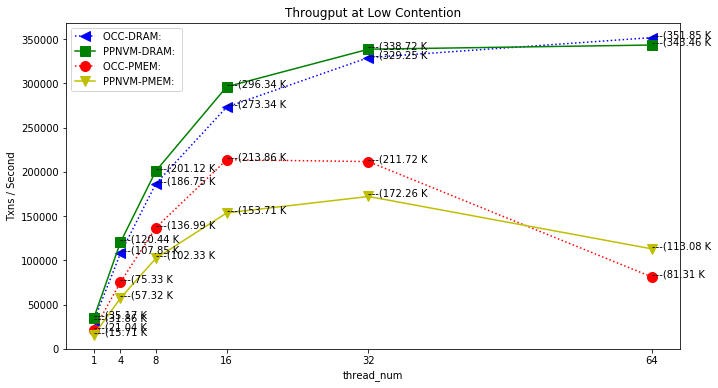

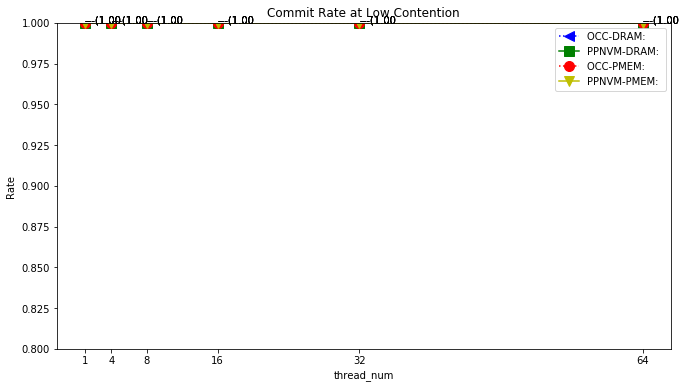

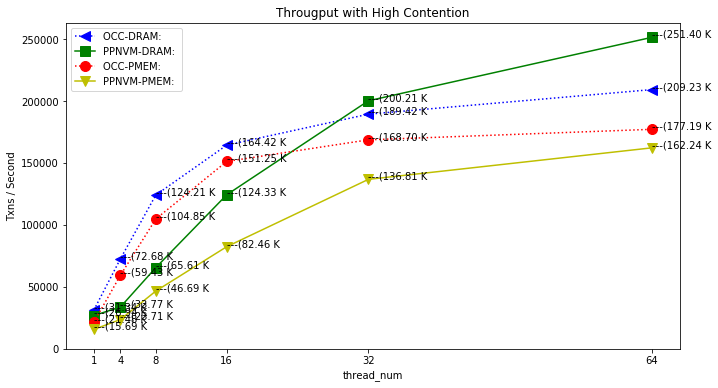

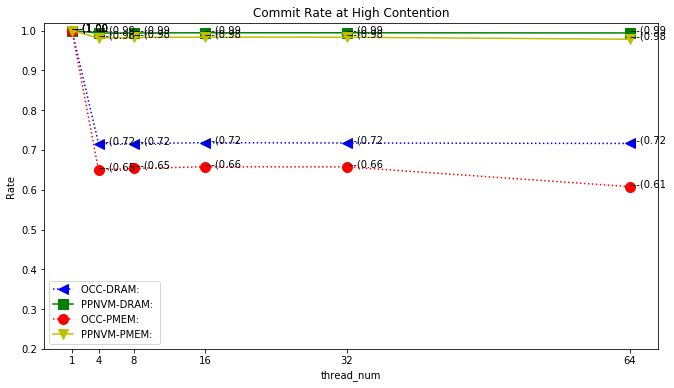

In [9]:
#########################
##### Intel Machine #####
#########################

markers = ['<', 's', 'o', 'v']
lines = [':', '-', ':', '-']
colors = ['b','g','r','y','p']

# Low contention
occ_vol = '../tpcc-res/low-vol-occ-output.csv'
ppnvm_vol = '../tpcc-res/low-vol-ppnvm-output.csv'
occ_pmem = '../tpcc-res/low-pmem-occ-output.csv'
ppnvm_pmem = '../tpcc-res/low-pmem-ppnvm-output.csv'

occ_vol = process_data(occ_vol, ['thread_num'])
ppnvm_vol = process_data(ppnvm_vol,  ['thread_num'], piece=True)
occ_pmem = process_data(occ_pmem, ['thread_num'])
ppnvm_pmem = process_data(ppnvm_pmem, ['thread_num'], piece=True)

draw_mul_serie([occ_vol, ppnvm_vol, occ_pmem, ppnvm_pmem], 
               'thread_num', 'tp',0, 'Througput at Low Contention', 'thread_num', 'Txns / Second', 
               ['thread_num'], markers, colors, ['OCC-DRAM',  'PPNVM-DRAM', 'OCC-PMEM', 'PPNVM-PMEM'],'',
               lambda v:'---(%.2f K' % (v/1000))


draw_mul_serie([occ_vol, ppnvm_vol, occ_pmem, ppnvm_pmem], 
               'thread_num', 'rate', 0.8, 'Commit Rate at Low Contention', 'thread_num', 'Rate ', 
               ['thread_num'], markers, colors, ['OCC-DRAM',  'PPNVM-DRAM', 'OCC-PMEM', 'PPNVM-PMEM'],'',
              lambda v:'---(%.2f' % (v))



# High contention
occ_vol = '../tpcc-res/high-vol-occ-output.csv'
ppnvm_vol = '../tpcc-res/high-vol-ppnvm-output.csv'
occ_pmem = '../tpcc-res/high-pmem-occ-output.csv'
ppnvm_pmem = '../tpcc-res/high-pmem-ppnvm-output.csv'

occ_vol = process_data(occ_vol, ['thread_num'])
ppnvm_vol = process_data(ppnvm_vol,  ['thread_num'], piece=True)
occ_pmem = process_data(occ_pmem, ['thread_num'])
ppnvm_pmem = process_data(ppnvm_pmem, ['thread_num'], piece=True)

draw_mul_serie([occ_vol, ppnvm_vol, occ_pmem, ppnvm_pmem], 
               'thread_num', 'tp', 0,'Througput with High Contention', 'thread_num', 'Txns / Second', 
               ['thread_num'], markers, colors, ['OCC-DRAM',  'PPNVM-DRAM', 'OCC-PMEM', 'PPNVM-PMEM'],'',
                lambda v:'---(%.2f K' % (v/1000))

draw_mul_serie([occ_vol, ppnvm_vol, occ_pmem, ppnvm_pmem], 
               'thread_num', 'rate', 0.2, 'Commit Rate at High Contention', 'thread_num', 'Rate ', 
               ['thread_num'], markers, colors, ['OCC-DRAM',  'PPNVM-DRAM', 'OCC-PMEM', 'PPNVM-PMEM'],'',
              lambda v:'---(%.2f' % (v))



In [3]:
#tpcc_occ_file = '../benchmark/tpcc-1.csv'
# data = process_data(tpcc_occ_file, ['thread_num'])
occ_tpcc_low = '../benchmark/tpcc-occ-1.csv'
pnvm_tpcc_low = '../benchmark/tpcc-pnvm-1.csv'
occ_tpcc_low = process_data(occ_tpcc_low, ['thread_num'])
pnvm_tpcc_low = process_data(pnvm_tpcc_low,  ['thread_num'])


#draw_one_serie(data, 'thread_num', ['tp', 'new-order-tp'], 'Througput', 'Threads', 'Txns / Second', ['thread_num'], markers, colors, ['OCC VOlatile'],'Threads' )
#draw_one_serie(data, 'thread_num', ['tp-core', 'new-order-core'], 'Througput', 'Threads', 'Txns / Second', ['thread_num'], markers, colors, ['OCC VOlatile'],'Threads' )

# Low contention
draw_mul_serie([occ_tpcc_low, pnvm_tpcc_low], 'thread_num', 'tp', 'Througput', 'thread_num', 'Txns / Second', ['thread_num'], markers, colors, ['OCC',  'Pieced PP'],'' )


# High contention
occ_tpcc_high = '../benchmark/tpcc-occ-4.csv'
pnvm_tpcc_high = '../benchmark/tpcc-pnvm-4.csv'
occ_tpcc_high = process_data(occ_tpcc_high, ['thread_num'])
pnvm_tpcc_high = process_data(pnvm_tpcc_high,  ['thread_num'])
print(occ_tpcc_high)
print(pnvm_tpcc_high)


draw_mul_serie([occ_tpcc_high, pnvm_tpcc_high], 'thread_num', 'tp', 'Througput', 'thread_num', 'Txns / Second', ['thread_num'], markers, colors, ['OCC',  'Pieced PP'],'' )



FileNotFoundError: File b'../benchmark/tpcc-occ-1.csv' does not exist